# Raport projektowy – Ocena jakości wina czerwonego Vinho Verde

### 1. Przedstawienie problemu.
Celem projektu było przygotowanie modelu uczenia maszynowego, który będzie w stanie z zadawalającą skutecznością klasyfikować wina czerwone gatunku Vinho Verde z północy Portugalii do kategorii jakościowych (od 1 do 10) na podstawie ich właściwości chemicznych.

### 2. Dane.
W zestawie danych wejściowych znalazło się 1599 obserwacji posiadających 11 zmiennych wejściowych i jedną zmienną wyjściową.

Lista zmiennych wejściowych:
  1. Kwasowość stała (g/L)
  2. Kwasowość lotna (g/L)
  3. Zawartość kwasu cytrynowego (g/L)
  4. Zawartość cukru resztkowego (g/L)
  5. Zawartość chlorków (g/L)
  6. Zawartość wolnego dwutlenku siarki (mg/L)
  7. Zawartość całkowita dwutlenku siarki (mg/L)
  8. Gęstość (g/cm3)
  9. pH (wartości od 0 do 14)
  10. Zawartość siarczanów (g/L)
  11. Zawartość alkoholu (%)
  12. Jakość (ocena od 0 do 10).

Zmienna wyjściowa:
  1.	Jakość (wartości od 1 do 10)

Link do danych: [Dane](https://github.com/UEPP40/PUM/blob/c1ab27e52bc82cc151bb217b27bd25dfd057d9e8/winequality-red.csv)

Rozkład zmiennych został przedstawiony na poniższych histogramach:

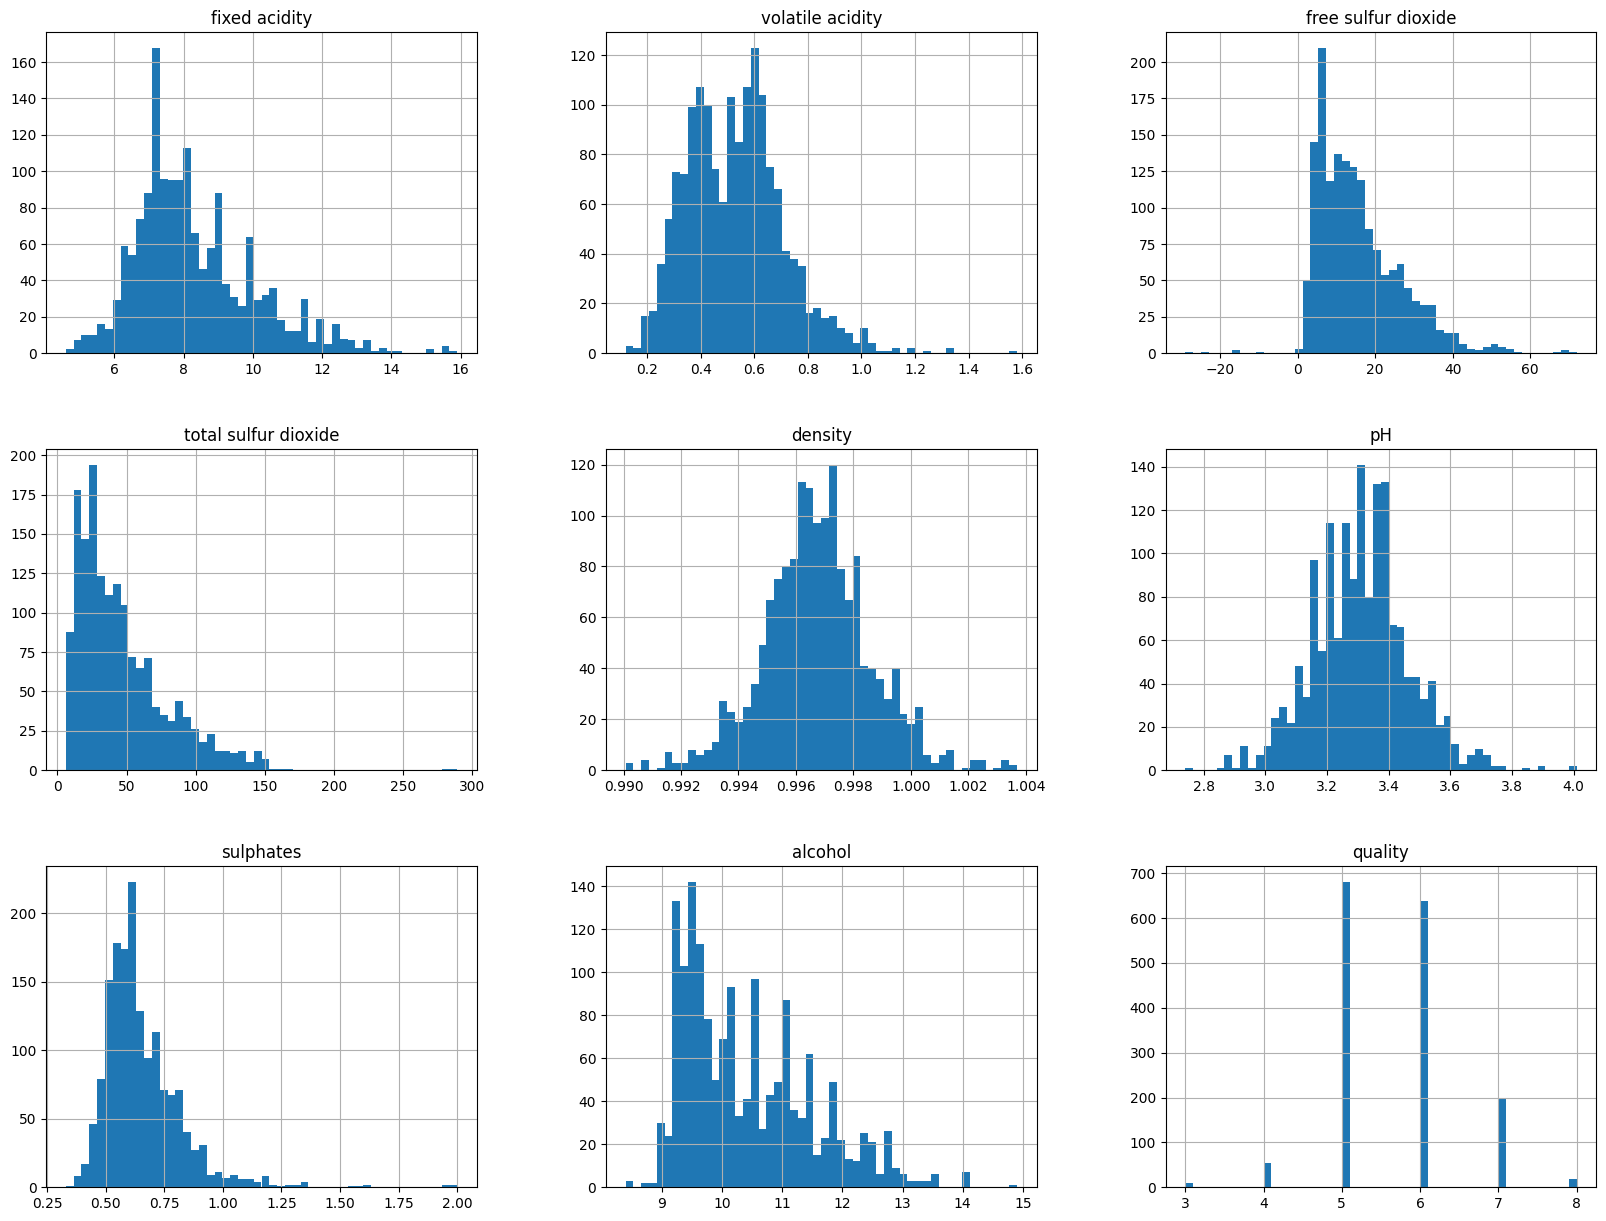

In [1]:
import raport_functions
data = raport_functions.get_starting_data()
raport_functions.display_histogram(data)

Podstawwowym problemem napotkanym w danych była duża rozbieżnośc pod względem ilość rekordów należących do poszczególnych klas jakościowych. Klasy 1, 2, 9 i 10 nie posiadały żadnych rekordów, a klasy 3, 4 i 8 posiadały ich niewiele. Zbiór danych był zdecydowanie zdominowany przez klasy 5, 6 i 7.

Podstawowe informacje o zbiorze danych:

In [2]:
raport_functions.display_info_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   object 
 3   residual sugar        1599 non-null   object 
 4   chlorides             1599 non-null   object 
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1595 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 150.0+ KB
None


Następnie dane zostały poddane procesowi pre-processingu. Wykonano następujące kroki:
1. Pozbyto się zbędnych znaków z wartości danych wejściowych.
2. Przekonwertowano typ danych dla wszystkich kolumn na numeryczny.
3. Odrzucono wszystkie rekordy posiadające puste wartości w którejkolwiek z kolumn.
4. Odrzucono wszystkie rekordy z wartościami skrajnymi w którejkolwiek z kolumn.

W wyniku czego w zbiorze danych pozostały 1503 rekordy.

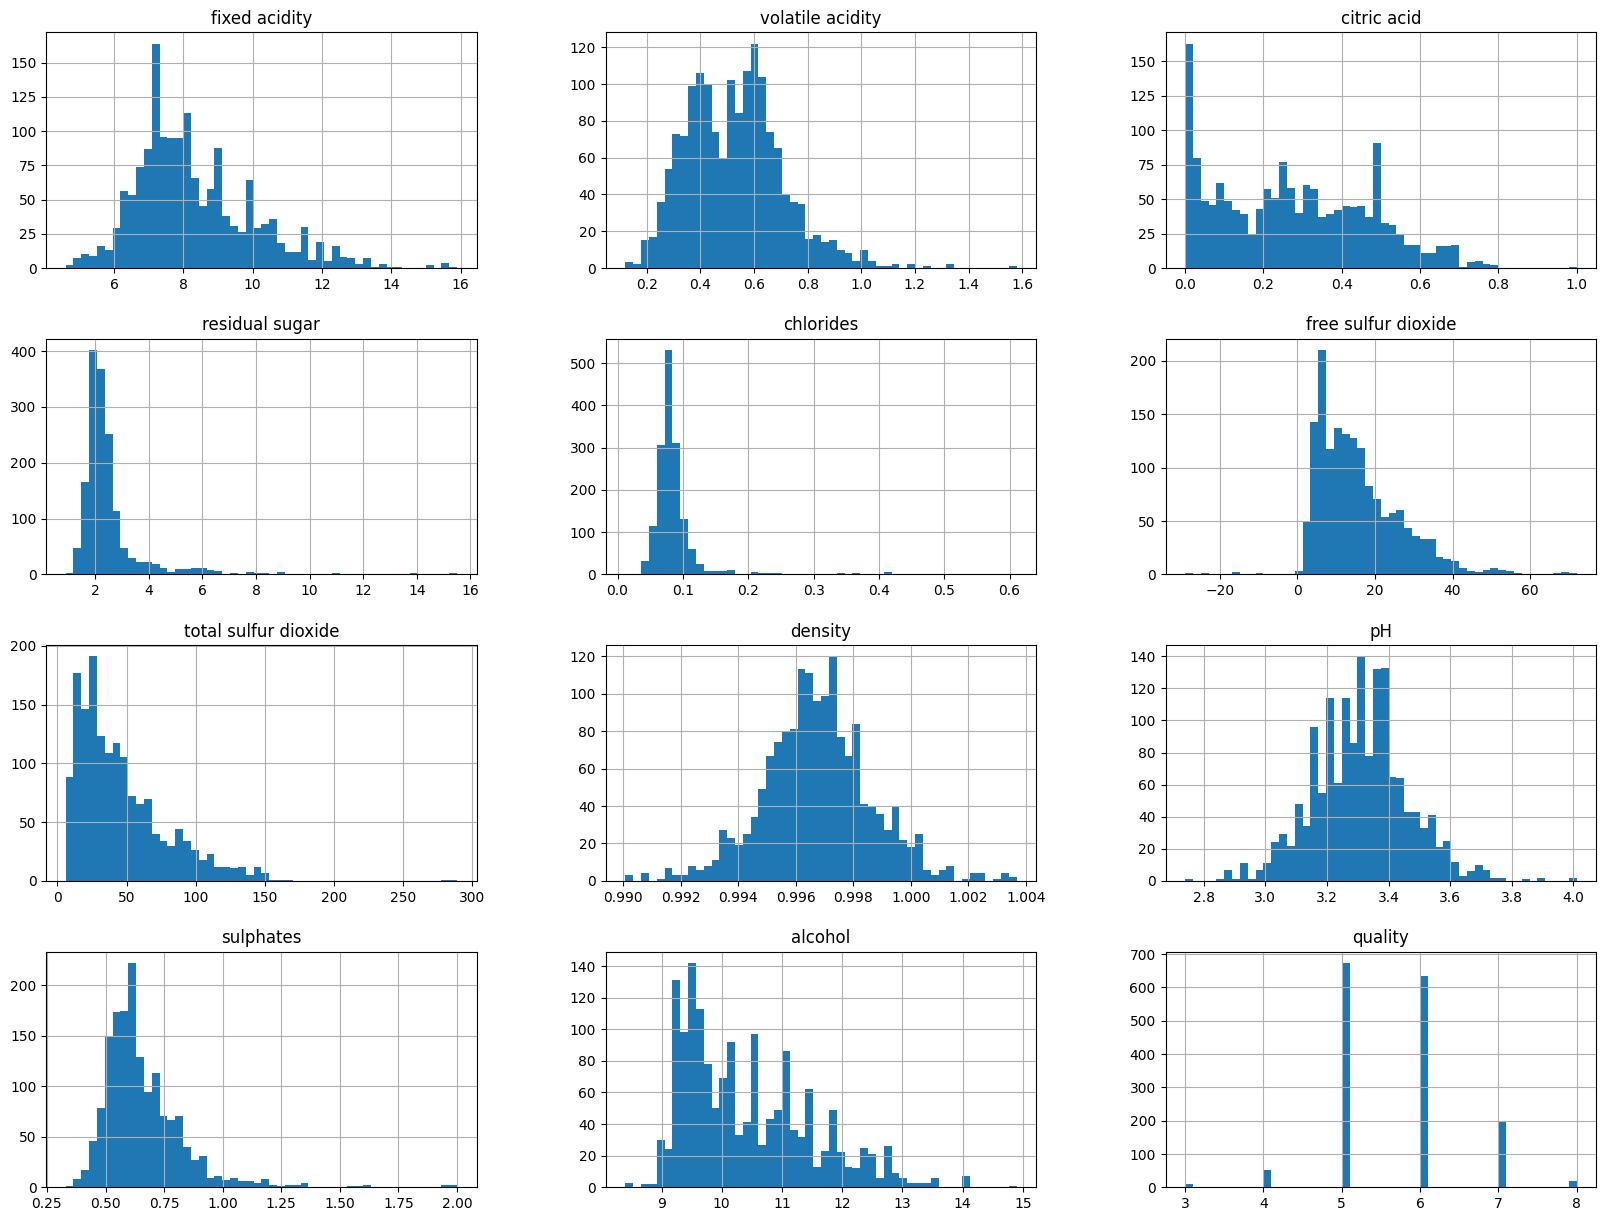

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1588 non-null   float64
 1   volatile acidity      1588 non-null   float64
 2   citric acid           1588 non-null   float64
 3   residual sugar        1588 non-null   float64
 4   chlorides             1588 non-null   float64
 5   free sulfur dioxide   1588 non-null   float64
 6   total sulfur dioxide  1588 non-null   float64
 7   density               1588 non-null   float64
 8   pH                    1588 non-null   float64
 9   sulphates             1588 non-null   float64
 10  alcohol               1588 non-null   float64
 11  quality               1588 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.3 KB
None


In [3]:
raport_functions.modify_data_initial(data)
raport_functions.display_histogram(data)
raport_functions.display_info_data(data)

Odrzucono także cechy o niskiej relewancji statystycznej. Za pułap, dla którego cecha została uznawana za istotną statystycznie, przyjęto korelację ze zmienną wynikową o wartości większej 0.1.

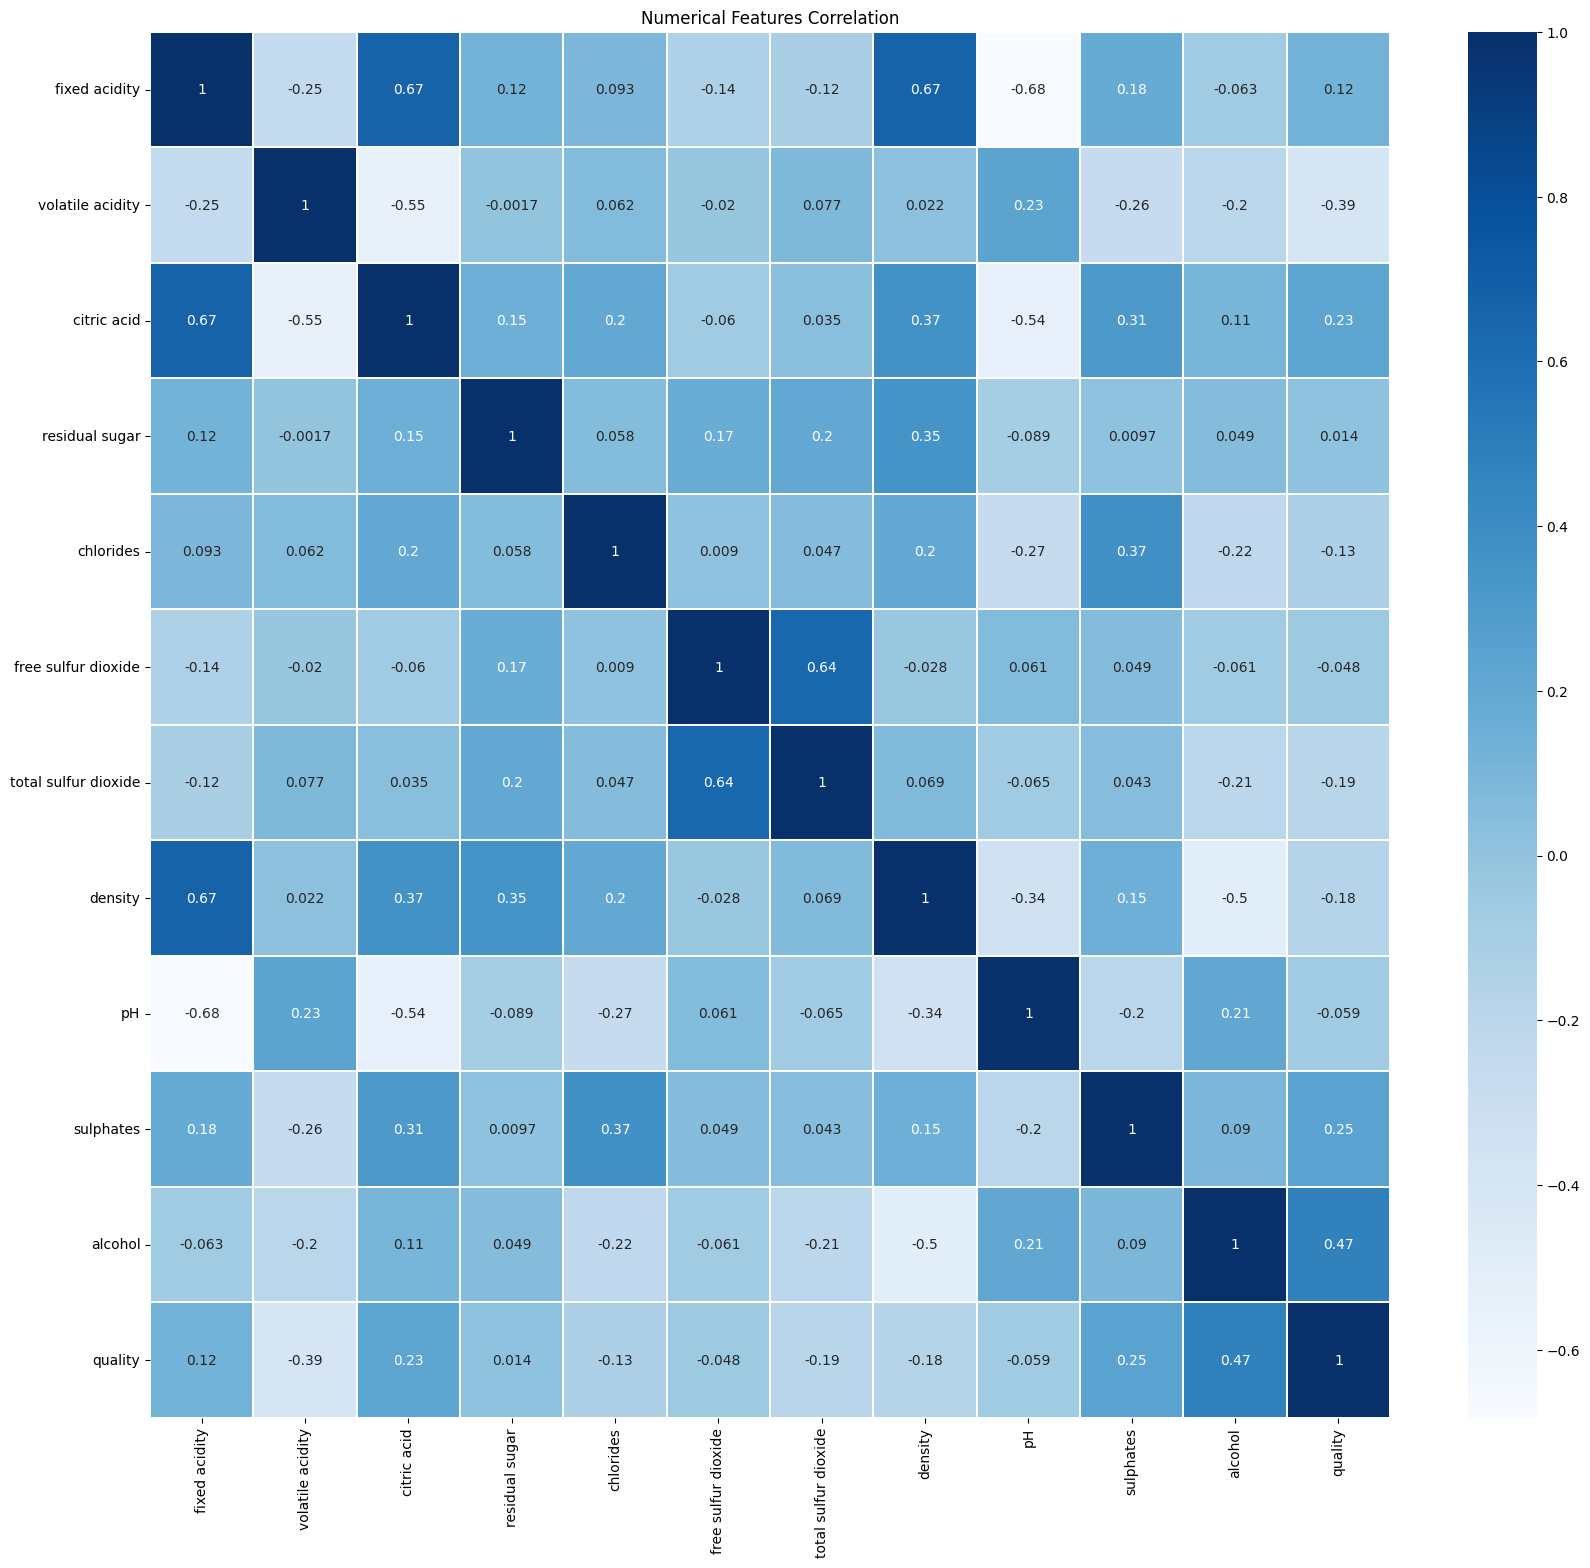

In [4]:
raport_functions.corr_matrix(data)

Cechy które pozostały w zbiorze danych to:
  1. Kwasowość stała (g/L).
  2. Zawartość kwasu cytrynowego (g/L).
  3. Zawartość chlorków (g/L).
  4. Zawartość całkowita dwutlenku siarki (mg/L).
  5. Gęstość (g/cm3).
  6. Zawartość siarczanów (g/L).
  7. Zawartość alkoholu (%).

### 2. Model 1 (benchmark) - Naive Bayes Classifier

Cechy modelu:
- Łatwy do implementacji i interpretacji
- Skalowalny
- Jest w stanie uchwycić złożone zależności
- Podatny na bycie kierowanym przez klasy dominujące

Kroki wykonane w ramach tworzenia modelu:
1. Inicjalizacja i przeskalowanie danych za pomoca StandardScalera.
2. Podział danych na zestaw treningowy i testowy w proporcji 4:1, co pozostawiło nas z 1202 rekordami z zbiorze treningowym i 301 w zbiorze testowym.
3. Wybranie strategii próbkowania.
4. Utworzenie obiektu klasy GaussianNB.
5. Uczenie i ewaluacja modelu o standardowych hiperparametrach przy wykorzystaniu walidacji krzyżowej (do celów poglądowych).
6. Definicja zbioru hiperparametów do zoptymalizowania.
7. Wyznaczenie optymalnych hiperparametrów.
8. Uczenie i ewaluacja modelu o standardowych hiperparametrach przy wykorzystaniu walidacji krzyżowej.
9. Wytrenowanie modelu o zoptymalizowanych parametrach.
10. Wykonanie przez model predykcji na zbiorze testowym.

Fitting 5 folds for each of 50 candidates, totalling 250 fits


2024-06-05 23:18:03,879 - INFO - Best parameters: {'var_smoothing': 0.43287612810830584}
2024-06-05 23:18:03,904 - INFO - Classification report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.63      0.82      0.71       120
           6       0.50      0.60      0.55       114
           7       0.78      0.13      0.23        52
           8       1.00      1.00      1.00         0

   micro avg       0.57      0.57      0.57       301
   macro avg       0.65      0.42      0.41       301
weighted avg       0.58      0.57      0.53       301



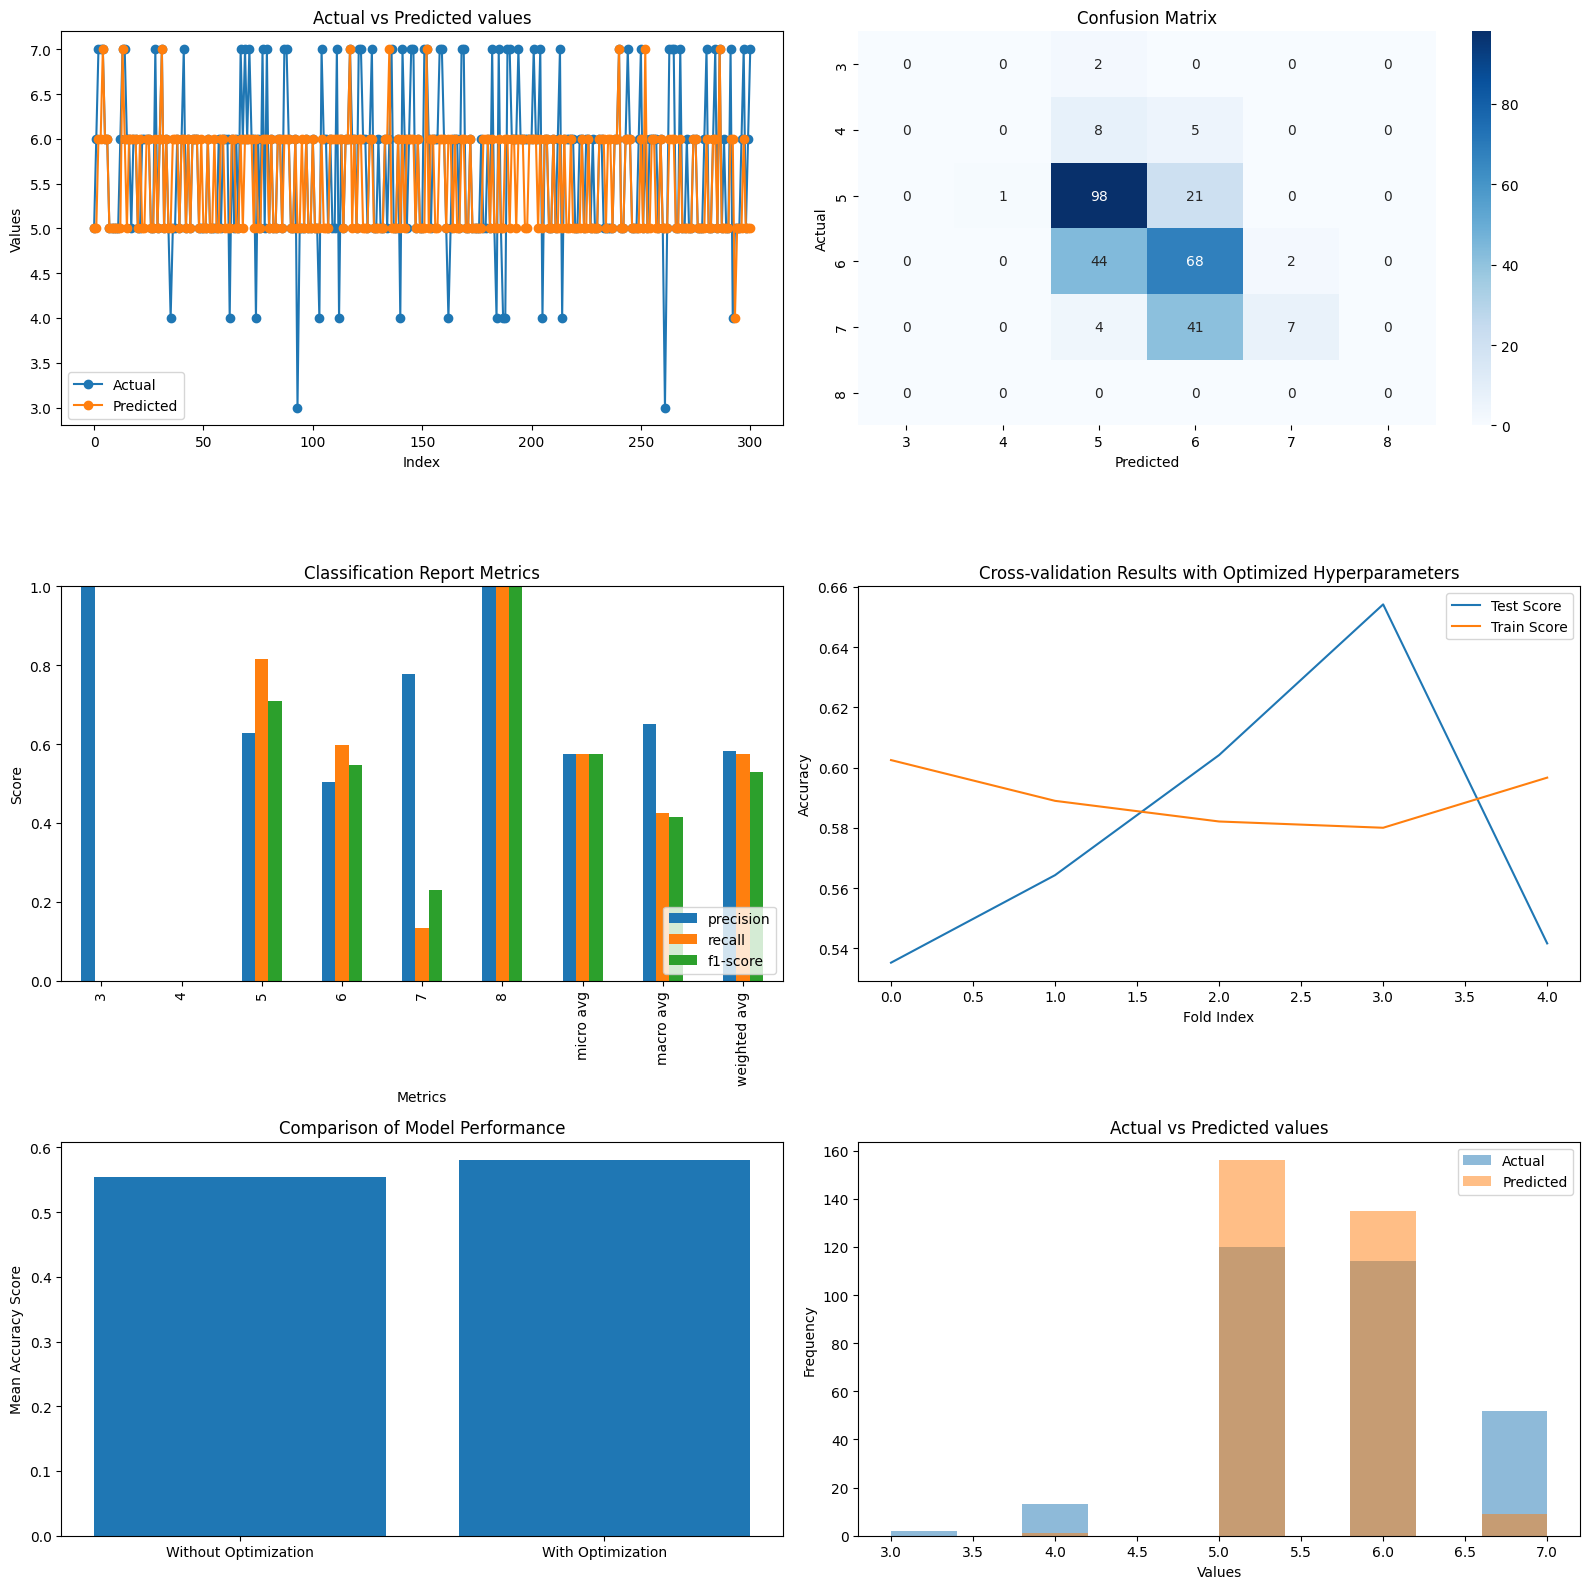

In [5]:
#Wyswietlenie raportu klasyfikacji, optymalnych hiperparametrów, macierzy pomyłek i innych przydatnych wykresów.
raport_functions.gaussian_naive_bayes_main()

### Ocena modelu:

#### Optymalne hiperparametry
Za optymalne hiperaprametry spośród podanych do wyznaczenia uznano:
- var_smoothing: 0.43287612810830584

#### Wyniki modelu
- model osiągnął dokładność na poziomie 57%
- klasą o najwyższym poziomie F1 była klasa 5, miara ta wyniosła dla niej 0.71
- miał tendecję do zbyt częstego w stosunku do danych rzeczywistych klasyfikowania win jako klasę 5
- wraz ze spadkiem liczby przedstawicieli danej klasy jakościowej w zbiorze danych, spadała także skuteczność modelu w klasyfikowaniu win do tychże klas.

#### Podsumowanie
Model nie poradził sobie dobrze z problemem klasyfikacji. Zarówno miara dokładności, jak i czułości, pozostawiają wiele do życzenia.

### 3. Model 2 - KNN

Cechy modelu:
- Potrafi osiągać dużą dokładność w warunkachb dobrze oznakowanych i wolnych od szumów danych, co ma miejsce w naszym przyoadku.
- Algorytm K-NN jest wyjątkowo dobry w rozpoznawaniu skomplikowanych wzorców w danych, takich jak wielowymiarowe cechy chemiczne wina, które mogą być subtelnie powiązane z jakością wina na dyskretnej skali od 1 do 10.
- W przeciwieństwie do innych technik klasyfikacyjnych, K-NN nie wymaga założeń statystycznych dotyczących rozkładu danych. Jest to korzystne w przypadku rzeczywistych, często nieskonsolidowanych zestawów danych, co zwiększa jego uniwersalność i adaptacyjność do różnorodnych zbiorów danych.
- K-NN pozwala na łatwą zmianę metryki dystansu (np. euklidesowa, Manhattan), co umożliwia dostosowanie algorytmu do specyfiki danych wina, które mogą różnić się skalą i naturą. Ta elastyczność jest kluczowa, gdy dane różnią się w zakresie ich skali lub wymagają niestandardowego traktowania dystansu.

Kroki wykonane w ramach tworzenia modelu:
1. Inicjalizacja i przeskalowanie danych za pomoca MinMaxScalera.
2. Podział danych na zestaw treningowy i testowy w proporcji 4:1, co pozostawiło nas z 1202 rekordami z zbiorze treningowym i 301 w zbiorze testowym.
3. Wybranie strategii próbkowania.
4. Utworzenie obiektu klasy KNeighborsClassifier.
5. Uczenie i ewaluacja modelu o standardowych hiperparametrach przy wykorzystaniu walidacji krzyżowej (do celów poglądowych).
6. Definicja zbioru hiperparametów do zoptymalizowania.
7. Wyznaczenie optymalnych hiperparametrów.
8. Uczenie i ewaluacja modelu o standardowych hiperparametrach przy wykorzystaniu walidacji krzyżowej.
9. Wytrenowanie modelu o zoptymalizowanych parametrach.
10. Wykonanie przez model predykcji na zbiorze testowym.

2024-06-05 23:18:05,258 - INFO - Data initialization and splitting complete.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


2024-06-05 23:18:06,637 - INFO - Best parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 1, 'algorithm': 'brute'}
2024-06-05 23:18:06,720 - INFO - Classification report:
              precision    recall  f1-score   support

           3       0.20      0.50      0.29         2
           4       0.00      0.00      0.00        13
           5       0.65      0.73      0.69       120
           6       0.66      0.59      0.62       114
           7       0.63      0.56      0.59        52
           8       0.00      1.00      0.00         0

    accuracy                           0.61       301
   macro avg       0.36      0.56      0.37       301
weighted avg       0.62      0.61      0.62       301



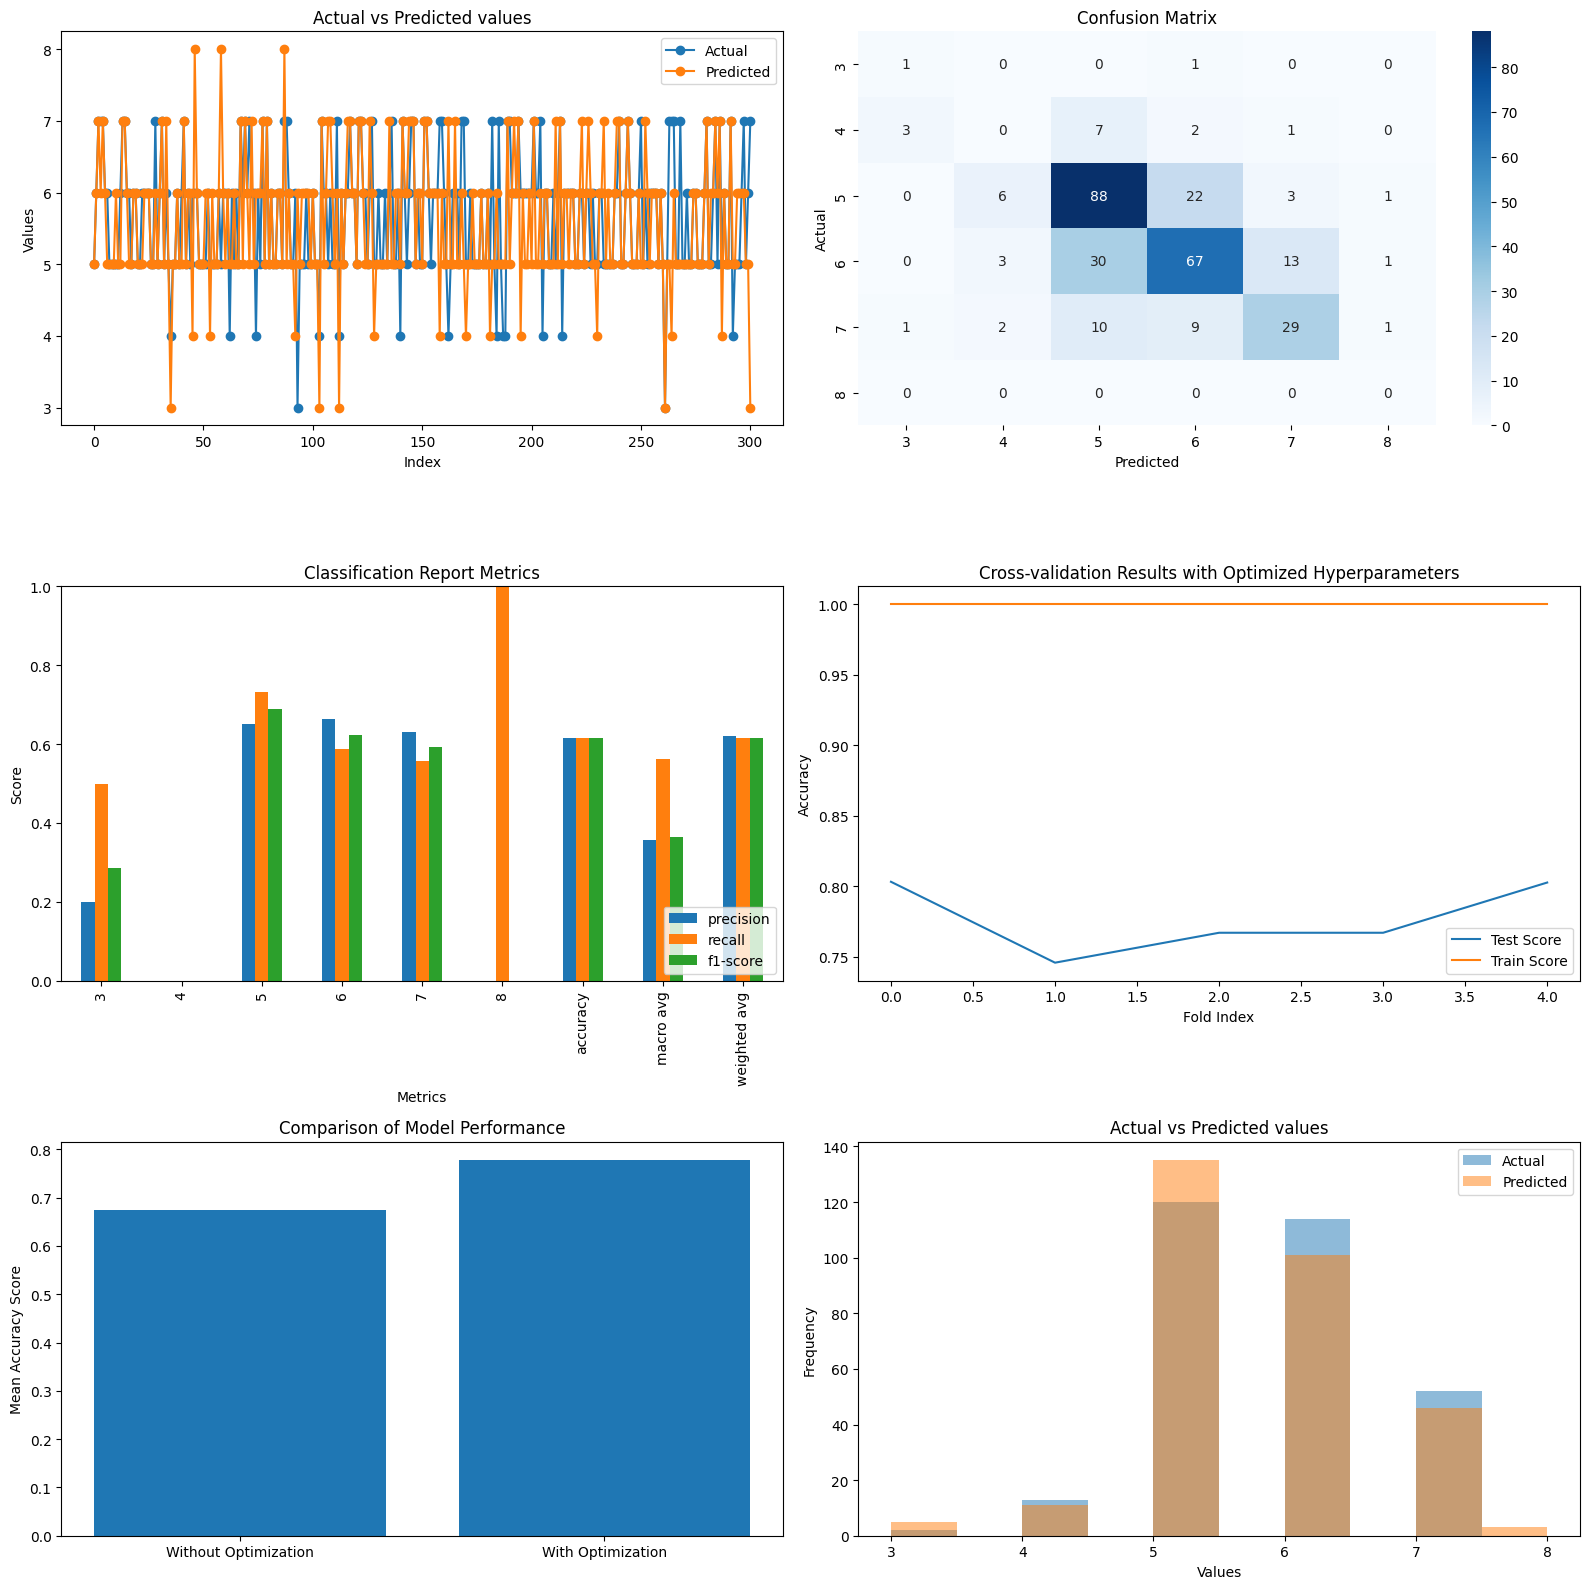

In [6]:
#Wyswietlenie raportu klasyfikacji, optymalnych hiperparametrów, macierzy pomyłek i innych przydatnych wykresów.
raport_functions.knn_main()

### Ocena modelu:

#### Optymalne hiperparametry
Za optymalne hiperaprametry spośród podanych do wyznaczenia uznano:
- weights: uniform, 
- p: 1,
- n_neighbors: 1, 
- algorithm: brute

#### Wyniki modelu
- model osiągnął dokładność na poziomie 61%
- klasą o najwyższym poziomie F1 była klasa 5, miara ta wyniosła dla niej 0.69. Oprócz niej, pułap 0.60 osiągnęła klasa 6
- miał tendecję do zbyt częstego w stosunku do danych rzeczywistych klasyfikowania win jako klasę 5 (oraz 3, ale w zdecydowanie mniejszym stopniu)
- wraz ze spadkiem liczby przedstawicieli danej klasy jakościowej w zbiorze danych, spadała także skuteczność modelu w klasyfikowaniu win do tychże klas.

#### Podsumowanie
Model wciąż nie można uznać za dobry w kontekście problemu klasyfikacji win, jednak okazał się od lepszym od modelu benchmarkowego, Bayes Naive Classifier.

### 4. Model 3 - Random Forest

Cechy modelu:
- Może radzić sobie z dużą liczbą zmiennych i skutecznie przetwarzać zmienne kategoryczne.
- Model oferuje możliwość oceny ważności każdej cechy w procesie decyzyjnym, co może być użyteczne w analizie danych.
- Random Forest zazwyczaj oferuje lepszą dokładność niż pojedyncze drzewa decyzyjne, ponieważ agregując wyniki wielu drzew redukuje ryzyko nadmiernego dopasowania 
- Łatwy w interpretacji

Kroki wykonane w ramach tworzenia modelu:
1. Inicjalizacja danych za pomoca StandardScalera.
2. Podział danych na zestaw treningowy i testowy w proporcji 4:1, co pozostawiło nas z 1202 rekordami z zbiorze treningowym i 301 w zbiorze testowym.
3. Wybranie strategii próbkowania.
4. Utworzenie obiektu klasy RandomForestClassifier.
5. Uczenie i ewaluacja modelu o standardowych hiperparametrach przy wykorzystaniu walidacji krzyżowej (do celów poglądowych).
6. Definicja zbioru hiperparametów do zoptymalizowania.
7. Wyznaczenie optymalnych hiperparametrów.
8. Uczenie i ewaluacja modelu o standardowych hiperparametrach przy wykorzystaniu walidacji krzyżowej.
9. Wytrenowanie modelu o zoptymalizowanych parametrach.
10. Wykonanie przez model predykcji na zbiorze testowym.

2024-06-05 23:18:07,732 - INFO - Data initialization and splitting complete.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


2024-06-05 23:18:59,331 - INFO - Best parameters: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 70, 'bootstrap': False}
2024-06-05 23:19:02,340 - INFO - Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.08      0.11        13
           5       0.69      0.75      0.72       120
           6       0.64      0.67      0.65       114
           7       0.75      0.58      0.65        52
           8       0.00      1.00      0.00         0

    accuracy                           0.65       301
   macro avg       0.37      0.51      0.35       301
weighted avg       0.65      0.65      0.65       301



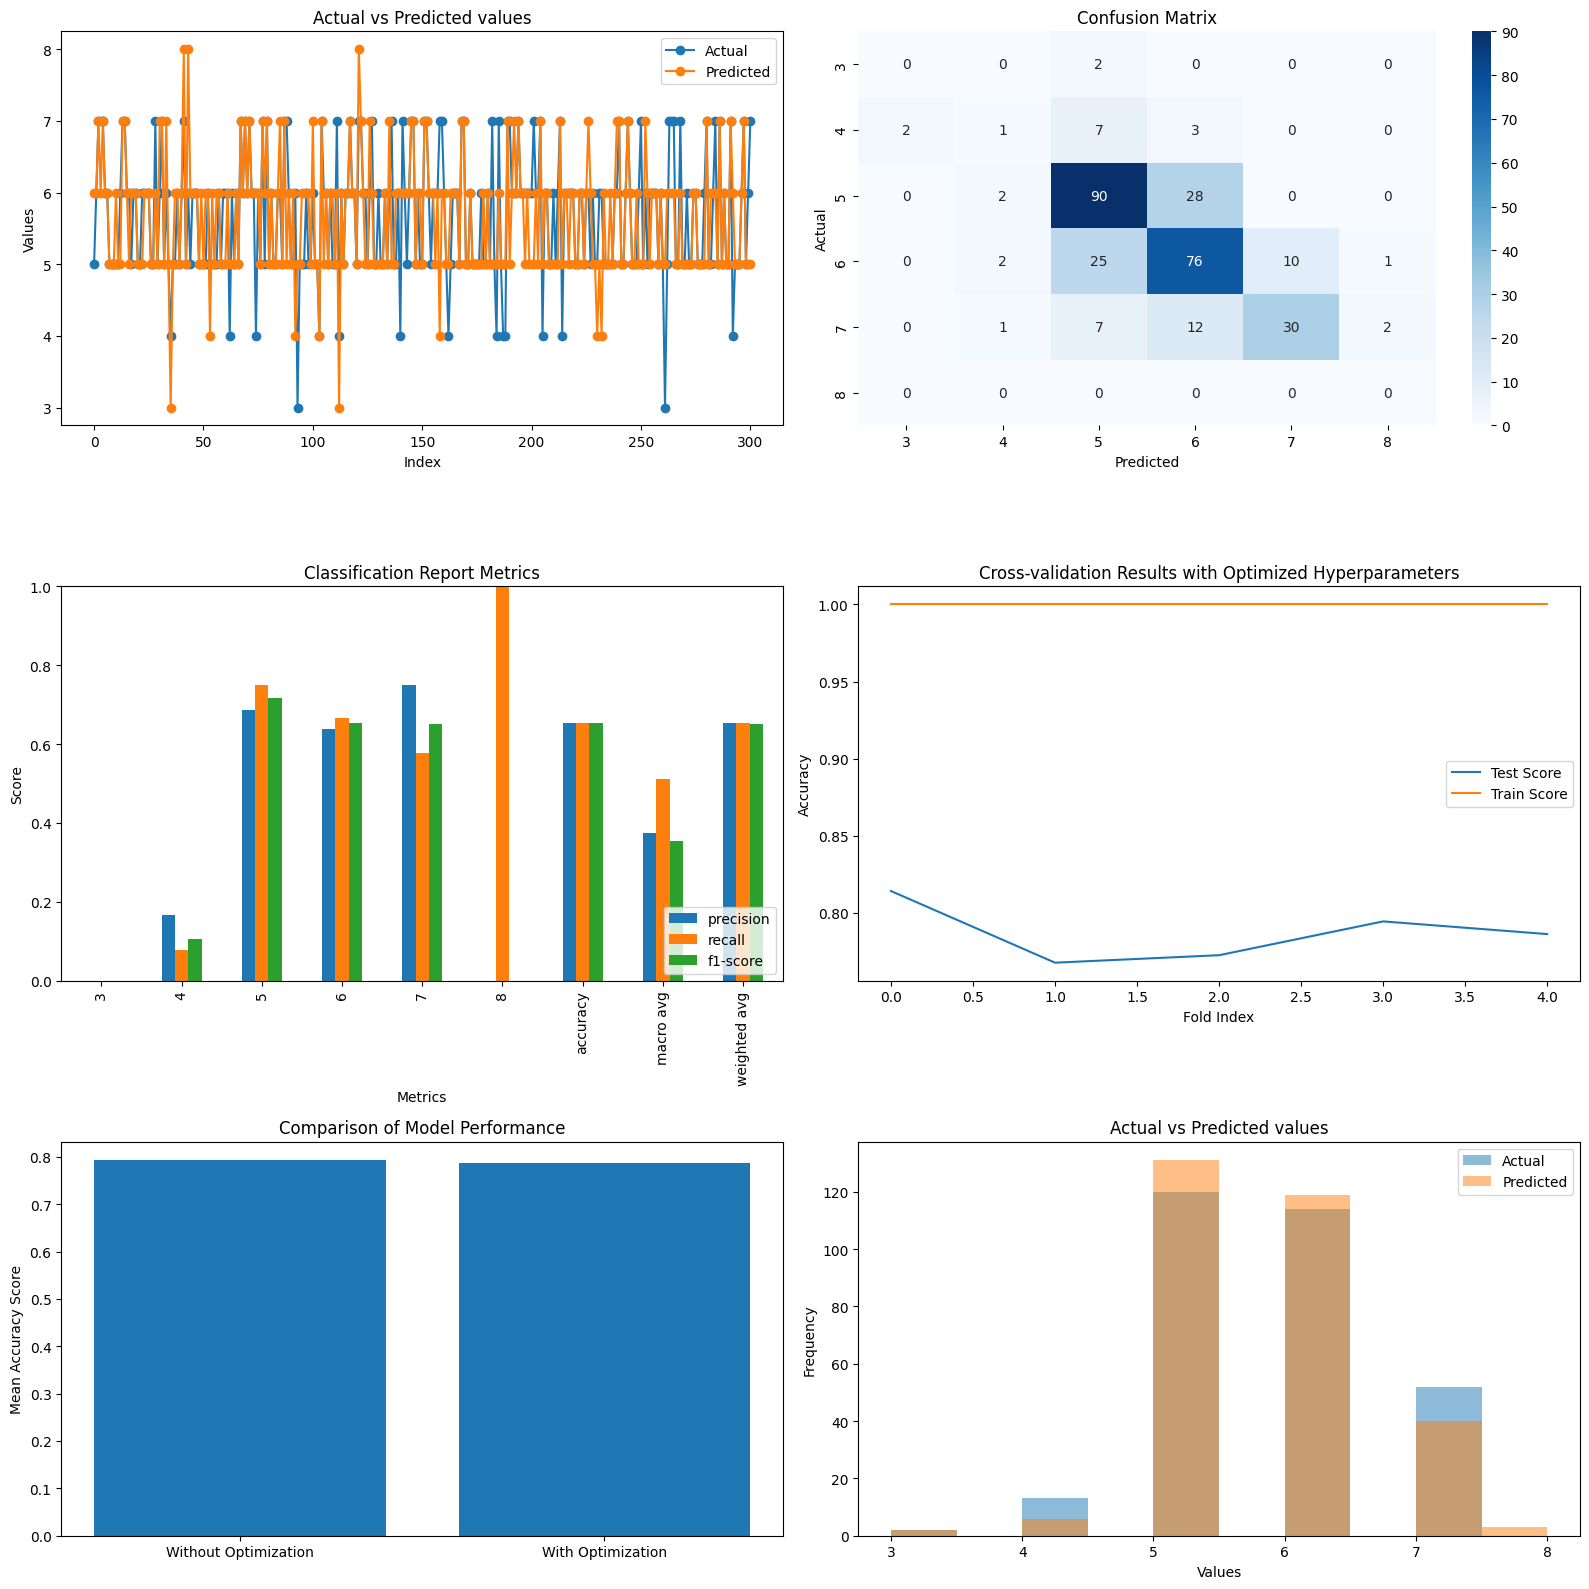

In [7]:
raport_functions.random_forest_main()